The Sparks Foundation - Data Science & Business Analytics Internship TASK 3: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In this task we will try to find out the weak areas where we can work to make more profit.

Steps to be followed:

Importing the libraries

Reading the dataset

Data Preprocessing

EDA

Data Visualization

Importing the libraries

In [1]:
# In this step we will import the required libraries 
import pandas as pd
from google.colab import files
from sklearn.datasets import load_files
data=files.upload()
import io
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Saving SampleSuperstore.csv to SampleSuperstore.csv


Reading the dataset

In [2]:
dataset=pd.read_csv(io.StringIO(data['SampleSuperstore.csv'].decode('utf-8')))

In [3]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Reading the dataset


In [4]:
dataset.shape

(9994, 13)

In [5]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# checking for duplicate values
dataset.duplicated().sum()

17

In [10]:
# dropping the duplicates
dataset.drop_duplicates()
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


EXPLORATORY DATA ANALYSIS

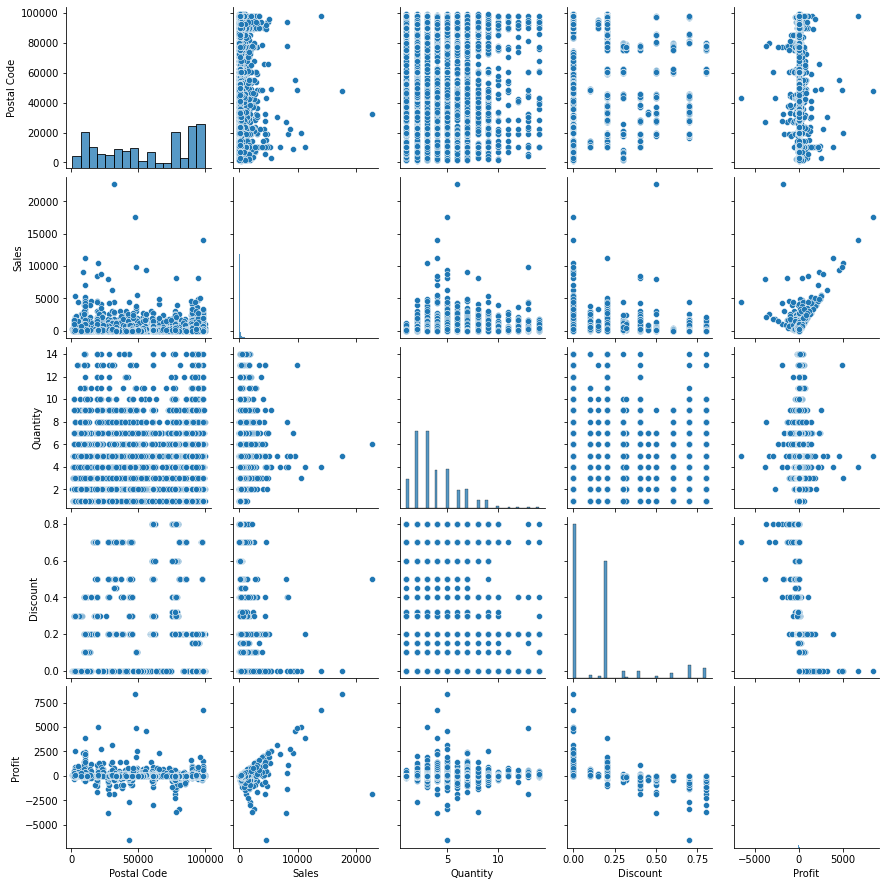

In [11]:
# visualizing the dataset as a whole using the pair plot
import seaborn as sns 
sns.pairplot(dataset)

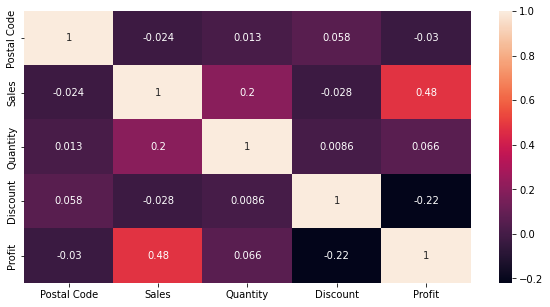

In [12]:
# finding the pairwise correlations between the columns and visualising using heatmaps
dataset.corr()
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

Visualizing the categories

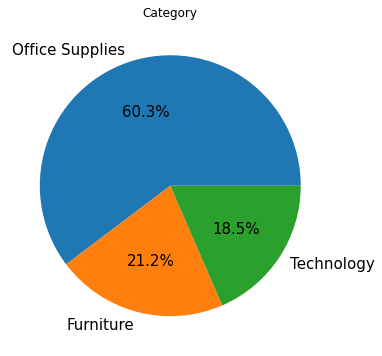

In [13]:
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x1152 with 0 Axes>

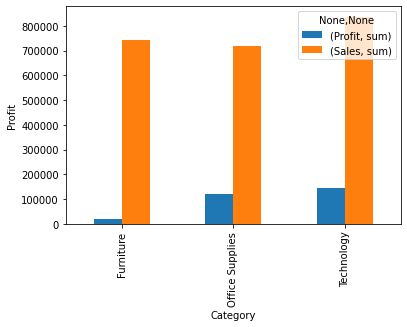

In [14]:
plt.figure(figsize= (10,16))
dataset.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

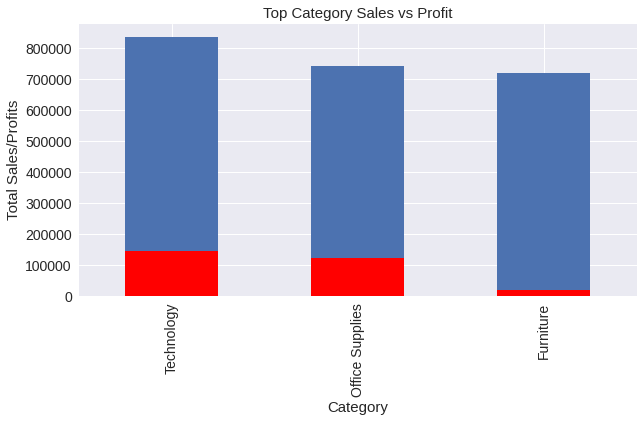

In [15]:
# computing top categories in terms of sales from first 100 observations
top_category_s = dataset.groupby("Category").Sales.sum().nlargest(n=100)
# computing top categories in terms of profit from first 100 observations
top_category_p = dataset.groupby("Category").Profit.sum().nlargest(n=100)

# plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_category_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Category Sales vs Profit",fontsize = 15)
plt.show()

Visualizing the sub-categories

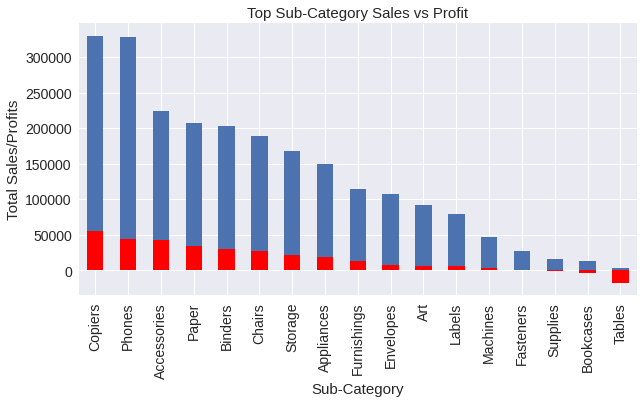

In [16]:
# computing top sub-categories in terms of sales from first 100 observations
top_subcategory_s = dataset.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
# computing top sub-categories in terms of profit from first 100 observations
top_subcategory_p = dataset.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

# plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_subcategory_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()

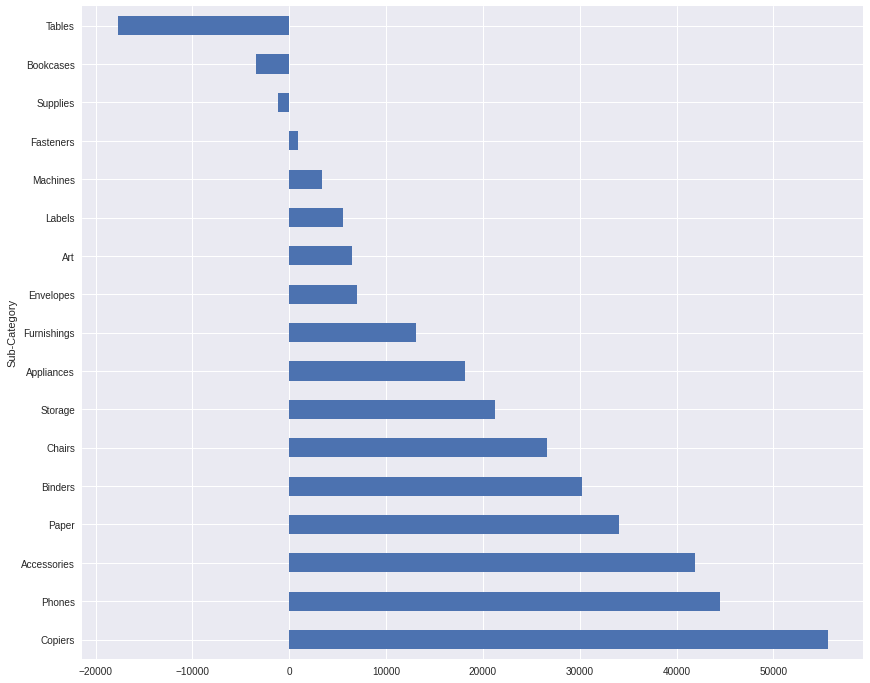

In [18]:
# A more detailed view
plt.figure(figsize=(14,12))
statewise = dataset.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh() # h for horizontal

The above graph clearly shows that Copiers and Phones have the highest sales and profit and tables has negative profit

Visualising the discount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


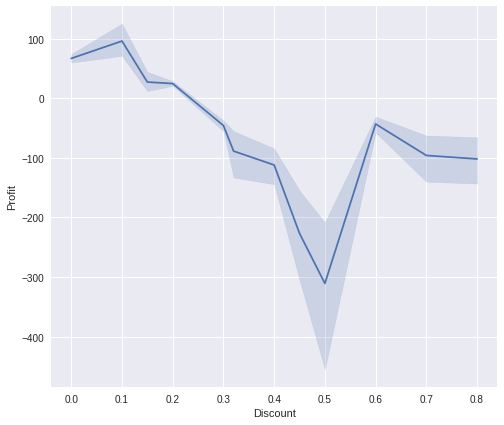

In [19]:
plt.figure(figsize=(8,7))
sns.lineplot(dataset['Discount'], dataset['Profit'], data=dataset)

Visualizing the Sales vs Profits in different Regions

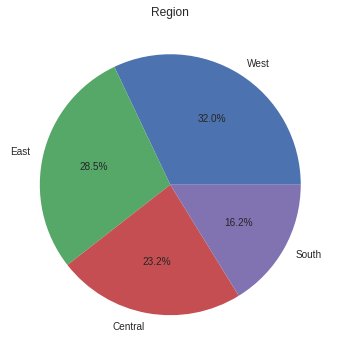

In [22]:
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(dataset['Region'].value_counts(), labels=dataset['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

The graph shows that West and East have same Profit though sales in the East are less as compared to West

Visualising the Sales vs Profits in different states

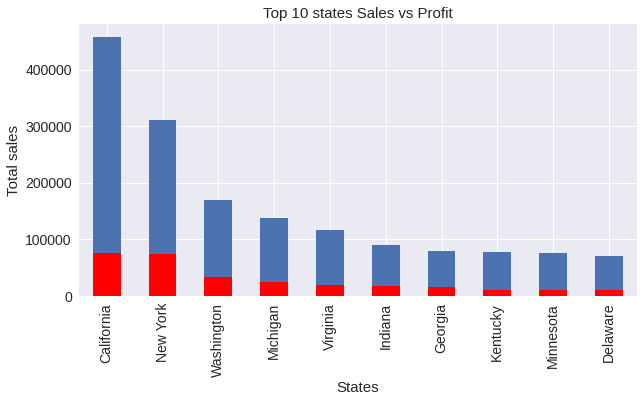

In [23]:
# computing top states in terms of sales from first 10 observations
top_states_s = dataset.groupby("State").Sales.sum().nlargest(n=10)

# computing top states in terms of profit from first 10 observations
top_states_p = dataset.groupby("State").Profit.sum().nlargest(n = 10)

plt.style.use('seaborn')
top_states_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_states_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("Top 10 states Sales vs Profit",fontsize = 15)
plt.show()

Checking the interdependency of Sales,Profits and Discounts

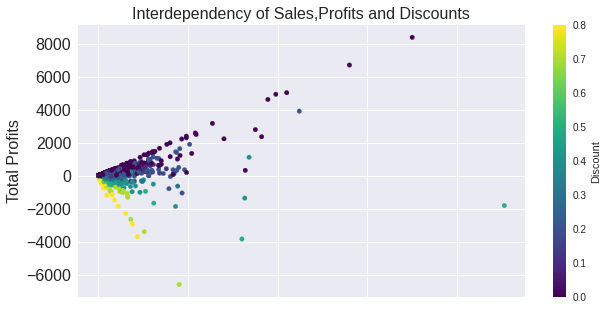

In [21]:
plt.style.use('seaborn')
dataset.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

The graph clearly shows that if we give more Discount on our products sales increases but profit decreases.

Conclusion :
The weak areas where one can work to make more profit are :

We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.

Considering the sub-categories sales of tables should be minimized.

Increase sales more in the east as profit is more.

We should concentrate on the states like 'New York' and 'California' to make more profits.